
第四章 動手實作非監督式學習
鳶尾花的分群

<p align="center" ><img src="https://www.ai4kids.ai/wp-content/uploads/2019/07/ai4kids_website_logo_120x40.png"></img></p>

## 第四章 動手實作非監督式學習
 
### 鳶尾花的分群
	
	![image.png])


<p align="right">© Copyright AI4kids.ai</p>

# Ｋ平均分群演算法 (K-means)

K-means 其實後來就是重複兩個步驟。

1. 測量資料(初始化: 指定 K 個分群，並隨機挑選 K 個資料點的值當作群組中心值)
  與質心距離來分群(每個資料群找個點設為距離最近的中心)

2. 不斷產生新的質心，就可以將資料有效分群！


# 資料分群 --> 降維
降維是什麼，為什麼可以降維？
明明是表示10個不同資訊的維度的資料，為什麼可以降到2維或3維呢？
其實是因為通常原始資料的不同維度之間其實不是獨立的，而在降維的過程就好像是在做圖片壓縮一樣，能用比較少的維度來表示原來資料大部分的資訊內容


第一步：載入所需套件

我們會先下載所需的資料集與引用相關套件。其中有一個套件是比較特別的，專門用來繪製3D立體圖像的Axes3D。

In [ ]:
!pip install sklearn

In [ ]:
# 從 sklearn 載入鳶尾花資料
from sklearn.datasets import load_iris

#載入我們會用到的模型 - K-means 模型
from sklearn.cluster import KMeans

#載入用來做資料視覺化的畫圖套件
import matplotlib.pyplot as plt

#載入 3D 繪圖工具
from mpl_toolkits.mplot3d import Axes3D  # 下圖是個範例


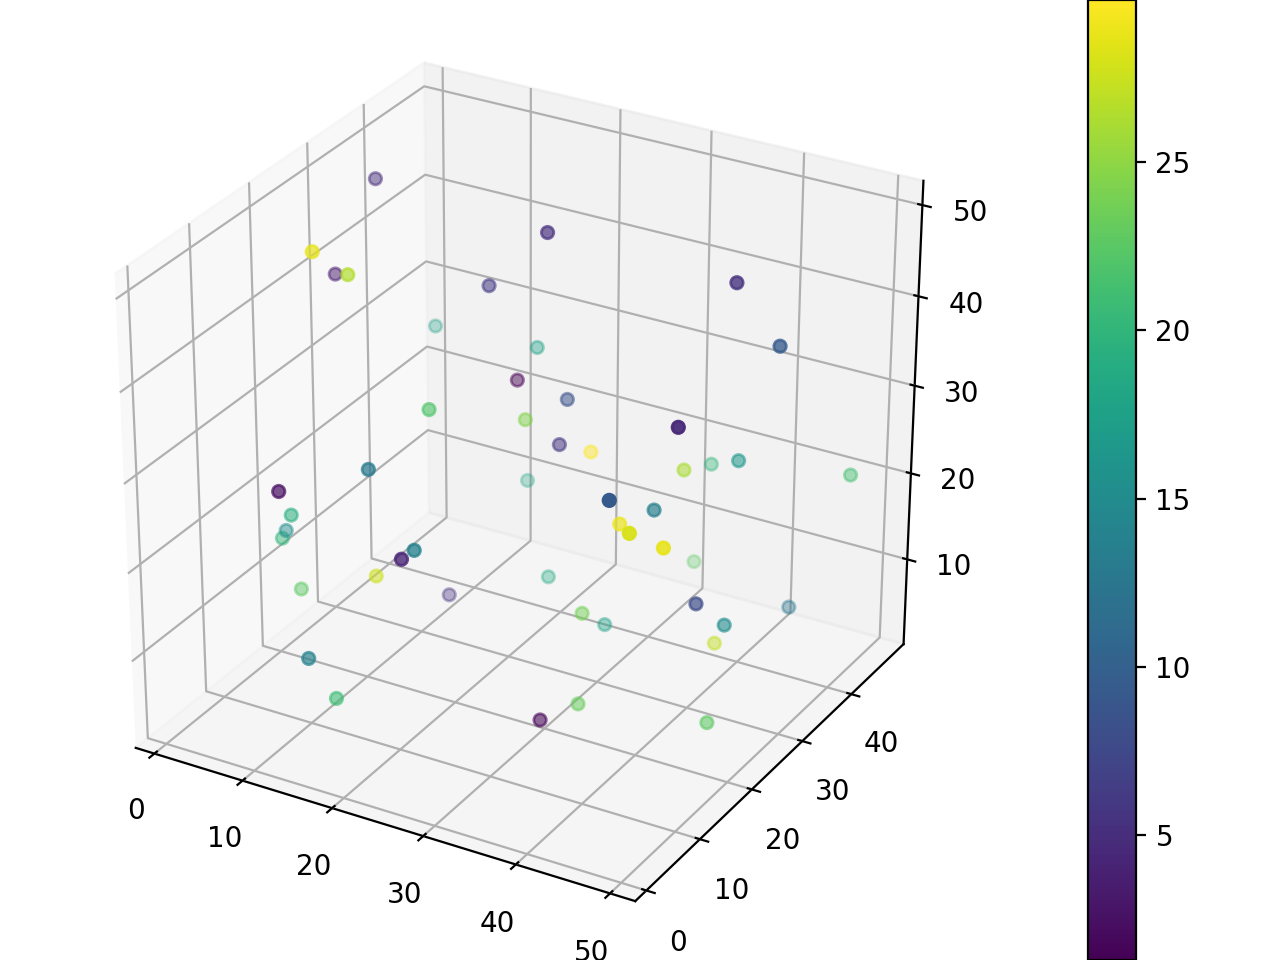

已知包含了150個樣本，都屬於鳶尾屬，分別是

#山鳶尾、變色鳶尾和維吉尼亞鳶尾。

(由左到右排序)。本節我們用這三種花的四個特徵：花萼、花瓣的長度和寬度，

我們用Ｋ平均分群演算法來實做看看花的分群預測結果是否準確。

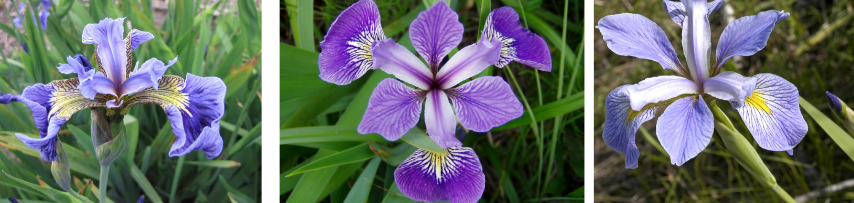

In [ ]:
#載入資料集, 放到digits變數內
iris = load_iris()

#觀察有哪些key 在資料筆內
print(iris.keys())


In [ ]:
#觀察資料筆數
print("資料筆數:")
print(iris.data.shape, "\n")

In [ ]:
#觀察我們資料欄位名稱
print("資料欄位名稱, 分別是:")
print(iris.feature_names, "\n")

In [ ]:
#觀察我們第一筆資料內容
print("第一筆資料內容:")
print(iris.data[0], "\n")

print("\n\n")

#觀察我們第一筆預測目標
print("第一筆預測目標:")
print(iris.target[0], "\n")

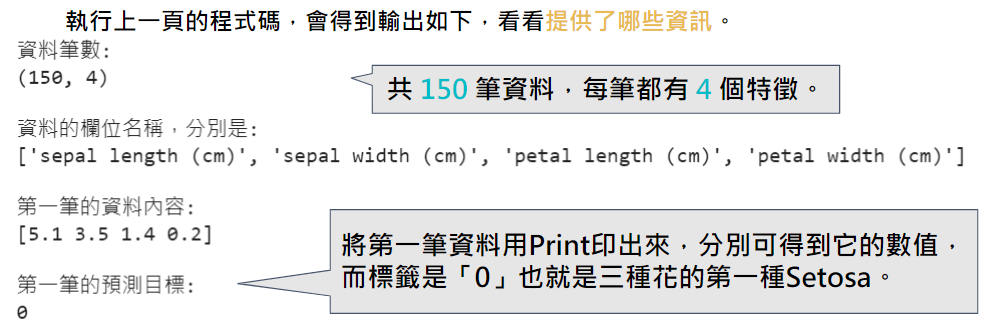

可以利用資料視覺化的方法來進一步觀察，鳶尾花的特徵共有四種，等於有四個維度，但因為平面圖只有兩個維度，所以我們分別挑選兩個特徵，來繪製圖表。

In [ ]:
#繪製散點圖, 利用花萼長度及花萼寬度作圖, 不同顏色代表不同種花
scatter = plt.scatter(iris.data[:,0], iris.data[:,1], c=iris.target)

#我們可以在 x,y 軸設定標題名稱
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

#可以設定一個說明視窗, 裡面分別放置顏色點及對應的類別名稱
#第一個參數設定我們的點, 第二個參數設定名稱
plt.legend(handles=scatter.legend_elements()[0], labels=iris.target_names.tolist())

#用挑選的兩個特徵(花萼長度、花萼寬度)作圖，可以得到如圖的結果。

#紫色的點是山鳶尾setosa 、綠色的點是變色鳶尾versicolor、黃色的點是維吉尼亞鳶尾virginica。


# 結果：以花萼長度來說維吉尼亞鳶尾偏長、山鳶尾則偏短，以花萼寬度來說山鳶尾則偏寬。

In [ ]:
# 重複上一動，只是這次換成另外兩個特徵: (花瓣長度及花瓣寬度)作圖，可以得到如圖的結果。
#繪製散點圖, 利用花萼長度及花萼寬度作圖, 不同顏色代表不同種花
scatter = plt.scatter(iris.data[:,2], iris.data[:,3], c=iris.target)
# 我們可以在 x,y 軸設定新標題名稱
plt.xlabel('Pepal length')
plt.ylabel('Pepal width')
plt.legend(handles=scatter.legend_elements()[0], labels=iris.target_names.tolist())
#結果：以花瓣長度來說山鳶尾則偏短、維吉尼亞鳶尾偏長，以花瓣寬度來說山鳶尾也則偏窄、維吉尼亞鳶尾偏寬。

# 訓練模型及驗證模型
因為我們想測試這個模型是否能依三種鳶尾花不同的特徵，將花朵分成正確的三群。


In [ ]:
# 我們利用 K-means，將K設為3 ( K=3 )！
# 載入 K-manes 模型, 設定將資料分成三群
estimator = KMeans(n_clusters=3, random_state=54)

# 進行模型訓練, 因為 K-means 是非監督是學習, 故不放入LABEL的標籤資料
estimator.fit(iris.data)
#KMeans(algorithm='auto', copy_x=True, init='kmenas++', max_iter=300, n_clusters=3, n_init=10,random_state=54, tol=0.0001, verbose=0 )

#印出來分群好的標籤來觀察
print(estimator.labels_)

我們完成了模型的訓練，並且將#分群好的標籤印出來，但單純的數字無法很直接的觀察電腦分群的依據為何。

In [ ]:
# 我們一樣可以將模型分群的結果用散佈圖的方式呈現出來，
# 並且與正確答案的散佈圖作比較，將會更容易了解分群的成效
# 這張圖用原始的LABEL來作圖
scatter = plt.scatter(iris.data[:,2],iris.data[:,3], c=iris.target)
plt.xlabel('Pepal length')
plt.ylabel('Pepal width')
plt.legend(handles=scatter.legend_elements()[0], labels=iris.target_names.tolist())
plt.show()

因此我們一樣可以將模型分群的結果用散佈圖的方式呈現出來，並且與正確答案的散佈圖作比較，將會更容易了解分群的成效。

In [ ]:
# 這張圖用KMeans分群好的LABEL來作圖
scatter = plt.scatter(iris.data[:,2],iris.data[:,3], c=estimator.labels_)
plt.xlabel('Pepal length')
plt.ylabel('Pepal width')

In [ ]:
#一樣可以將模型分群的結果用散佈圖的方式呈現出來，並且與正確答案的散佈圖作比較，將會更容易了解分群的成效。

#我們可以把 K-means 找到的中心位置給畫出來, 我們畫成星號, 配置紅色, s為size的縮寫及設置大小

plt.scatter(estimator.cluster_centers_[:,2], estimator.cluster_centers_[:,3], marker='*', c='red', s=100)
plt.legend(*scatter.legend_elements())
plt.show()

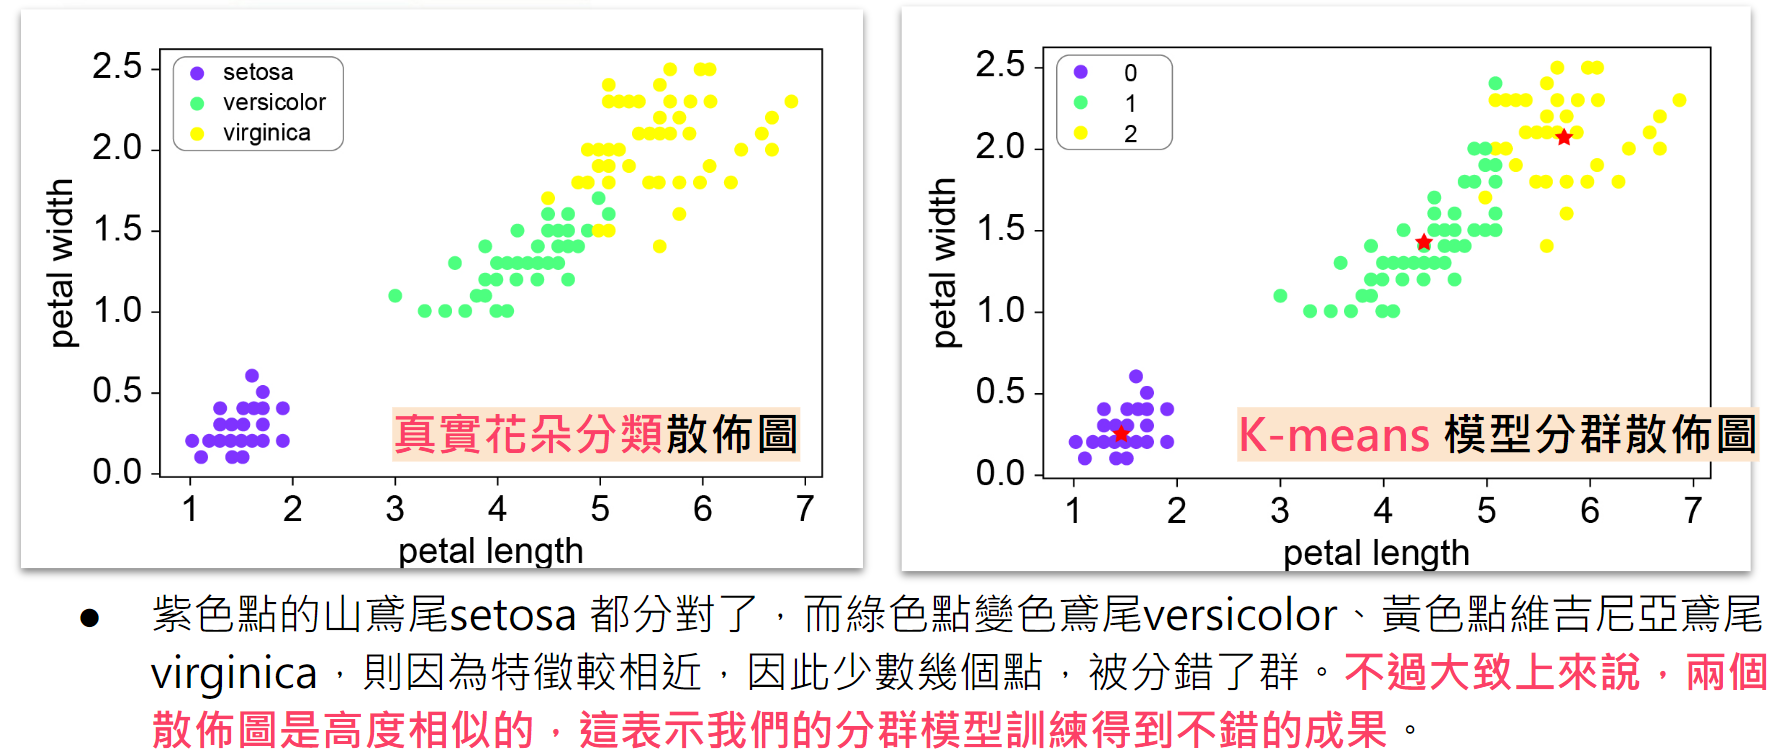

# 接著我們更上層樓，使用matplotlib的Axes3D來繪製三維立體的視覺化圖示！


In [ ]:
#接著我們更上層樓，使用matplotlib的Axes3D來繪製三維立體的視覺化圖示！
#接下來三行是繪圖環境的設置
# elev 是從不同的高度視角看過去
# azim 是從不同的水平視角看過去

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0,0,.95,1], elev=40, azim=130)
#嘗試不同視角
#ax = Axes3D(fig, rect=[0,0,.95,1], elev=70, azim=100)
ax.set_zlim(2, 4.5)

#以下是繪圖資訊, 這次的繪圖有兩個部分
#1.)先將鳶尾花的資料匯出: iris.data[:,2], iris.data[:,3], iris.data[:,1], 這邊有三個特徵被我們拿出來做三個維度的座標
#2.) c 參數是顏色變數, 我們說我們剛剛畫上空間的每一顆資料的顏色會根據 label 而決定,
#  而label是根據 estimator也就是KMeans 訓練過的模型結果

ax.scatter(iris.data[:,2], iris.data[:,3], iris.data[:,1], c=estimator.labels_)
ax.scatter(estimator.cluster_centers_[:,2], estimator.cluster_centers_[:,3], estimator.cluster_centers_[:,1], marker='*', c='red', s=100)

plt.legend(*scatter.legend_elements(), loc='lower right')
plt.show()


In [ ]:
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig, rect=[0,0,.95,1], elev=40, azim=130)
ax.set_zlim(2, 4.5)

ax.scatter(iris.data[:,2], iris.data[:,3], iris.data[:,1], c=iris.target)
plt.legend( handles=scatter.legend_elements()[0], labels=iris.target_names.tolist(), loc='lower right')
plt.show()


# **分群的結果確從3D立體的散佈圖來觀察，實也與真實的分類高度相似，因此我們可以透過這個實作初步體驗到，電腦採行非監督式學習的方式，確實能自行探索資料的特徵做出高精準度的判斷。**

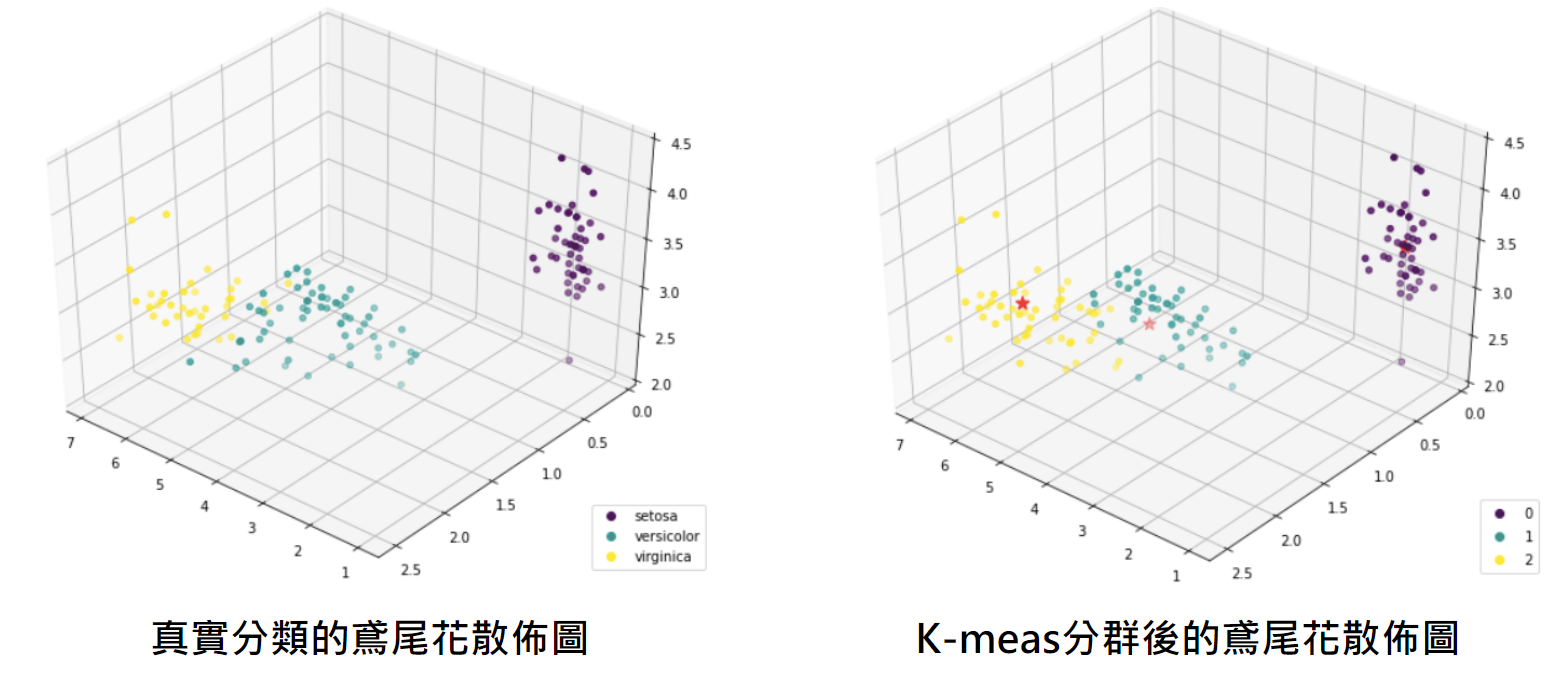

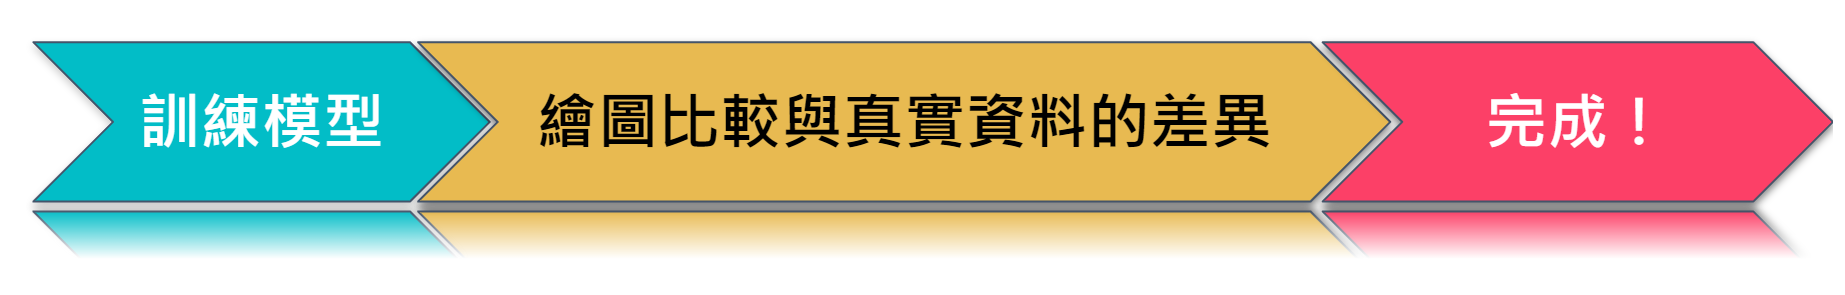

***回顧一下, KNN 與 Kmeans***

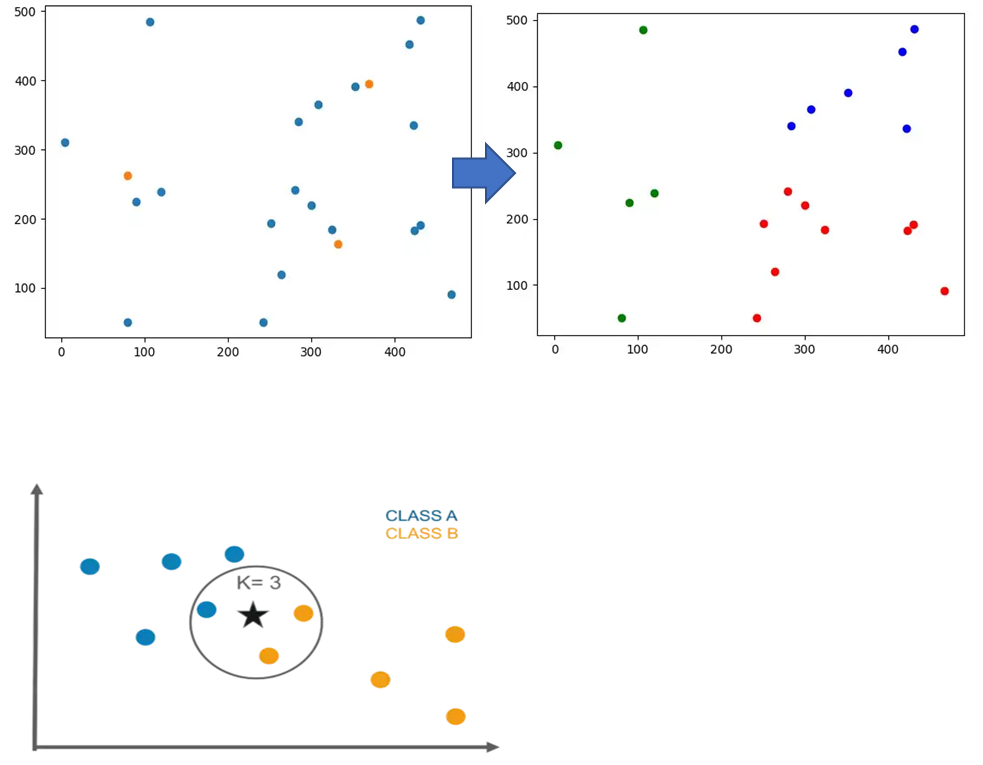

#如果分群程式重複執行多次，　每次所繪出來的分群結果圖　會是一樣的嗎？


# 如果用鳶尾花的另三種特徵，　　用K-means模型程式訓練分群，　結果會是如何？
